Financial News & Stock Analysis - Task 2


Technical Indicators with TA-Lib using yfinance CSV Data

Import libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# TA-Lib for indicators
import talib

# PyNance and PyFolio will be used later, we just import them now
import talib                      # technical indicators
import pynance as py              # from GitHub version
import quantstats as qs   

# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)


Define symbols and load data

In [120]:
#Define symbols and load data
symbols = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]
loader = StockDataLoader(data_path="../data/yfinance_data")
stock_data = loader.load_multiple_stocks(symbols)

# Summaries of loaded data
for symbol, df in stock_data.items():
    print(f"=== {symbol} ===")
    print(loader.get_data_summary(df))
    print(df.head(), "\n")



Loading AAPL...
📁 Loading from: ../data/yfinance_data\AAPL.csv
📊 Initial columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
📅 Initial shape: (3774, 6)
🔧 Standardized columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✅ Loaded 3774 days of data for AAPL
✅ Successfully loaded AAPL

Loading AMZN...
📁 Loading from: ../data/yfinance_data\AMZN.csv
📊 Initial columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
📅 Initial shape: (3774, 6)
🔧 Standardized columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✅ Loaded 3774 days of data for AMZN
✅ Successfully loaded AMZN

Loading GOOG...
📁 Loading from: ../data/yfinance_data\GOOG.csv
📊 Initial columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
📅 Initial shape: (3774, 6)
🔧 Standardized columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✅ Loaded 3774 days of data for GOOG
✅ Successfully loaded GOOG

Loading META...
📁 Loading from: ../data/yfinance_data\META.csv
📊 Initial columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Vo

EDA: price and volume


PRICE AND VOLUME ANALYSIS: AAPL
         count          mean           std           min           25%  \
Close   3774.0  5.384117e+01  5.506404e+01  2.345299e+00  1.505036e+01   
Volume  3774.0  2.640640e+08  2.345629e+08  2.404830e+07  9.581845e+07   

                 50%           75%           max  
Close   2.697581e+01  7.466420e+01  1.962566e+02  
Volume  1.667348e+08  3.777410e+08  1.880998e+09  


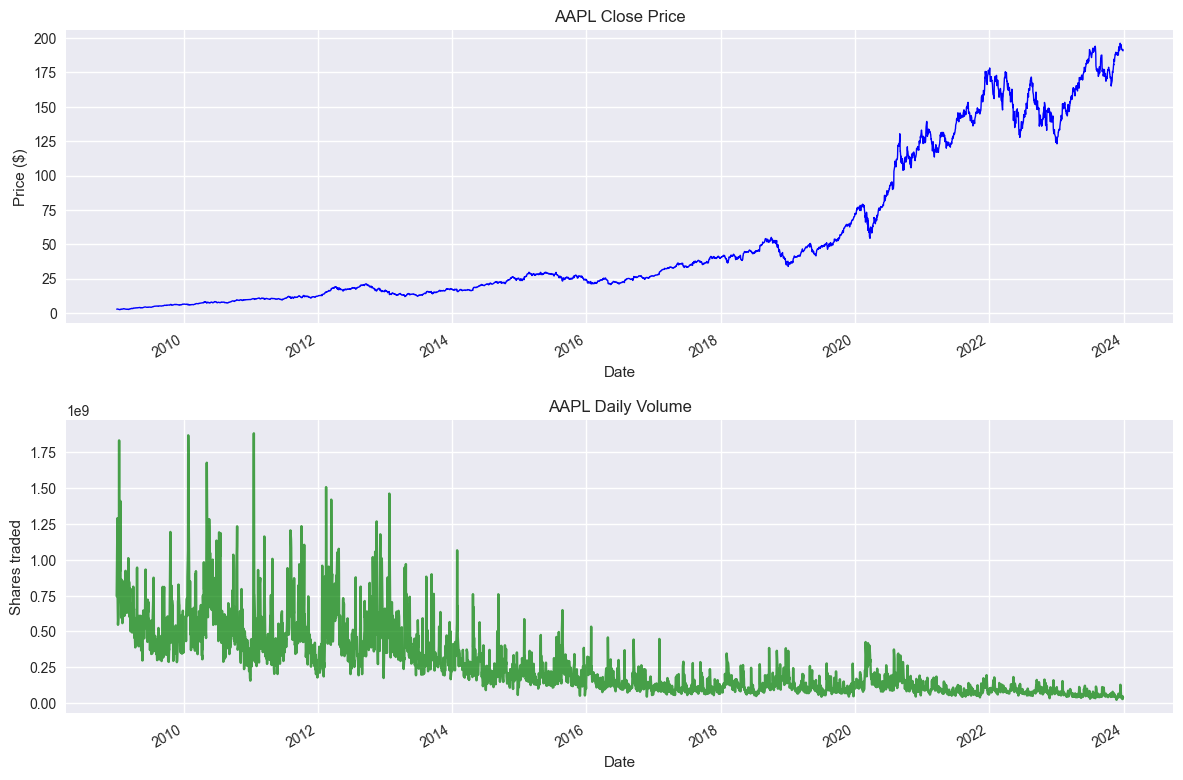


PRICE AND VOLUME ANALYSIS: AMZN
         count          mean           std           min           25%  \
Close   3774.0  5.940809e+01  5.491854e+01  2.422000e+00  1.219450e+01   
Volume  3774.0  9.185184e+07  6.057553e+07  1.762600e+07  5.586350e+07   

                 50%           75%           max  
Close   3.635950e+01  9.663825e+01  1.865705e+02  
Volume  7.520600e+07  1.086060e+08  1.166116e+09  


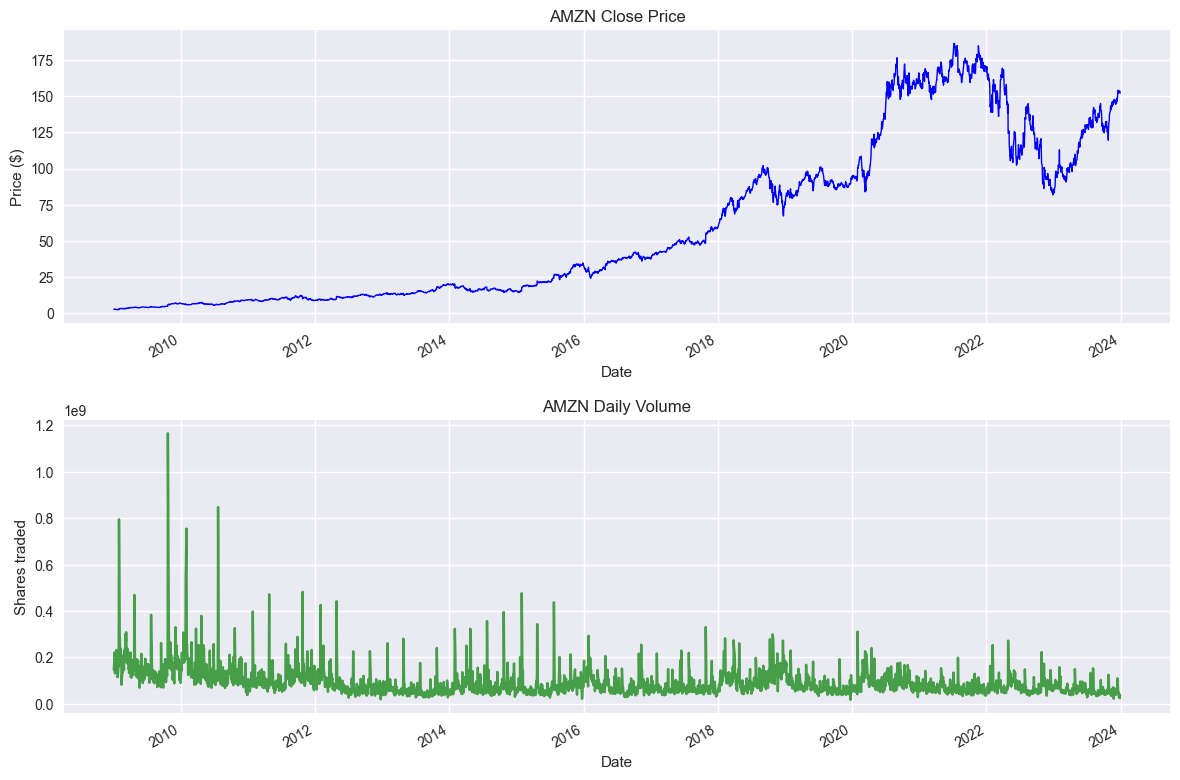


PRICE AND VOLUME ANALYSIS: GOOG
         count          mean           std           min           25%  \
Close   3774.0  5.077997e+01  3.941744e+01       6.99449  1.685109e+01   
Volume  3774.0  6.123096e+07  5.537396e+07  158434.00000  2.574863e+07   

                 50%           75%           max  
Close   3.732780e+01  6.919150e+01  1.496847e+02  
Volume  3.797798e+07  8.269781e+07  5.952147e+08  


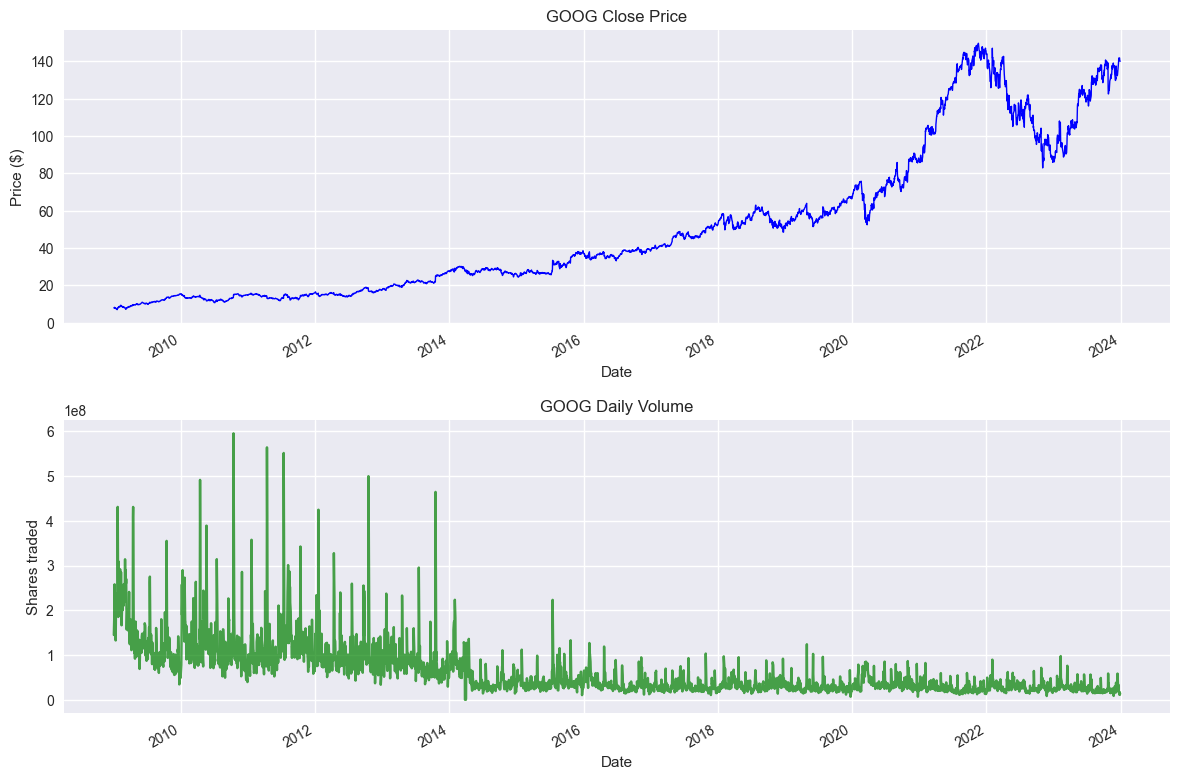


PRICE AND VOLUME ANALYSIS: META
         count          mean           std           min           25%  \
Close   2923.0  1.567274e+02  9.036877e+01  1.762137e+01  8.027512e+01   
Volume  2923.0  3.060615e+07  2.637157e+07  5.467500e+06  1.633730e+07   

                 50%           75%           max  
Close   1.525794e+02  2.035502e+02  3.798384e+02  
Volume  2.295390e+07  3.522740e+07  5.735764e+08  


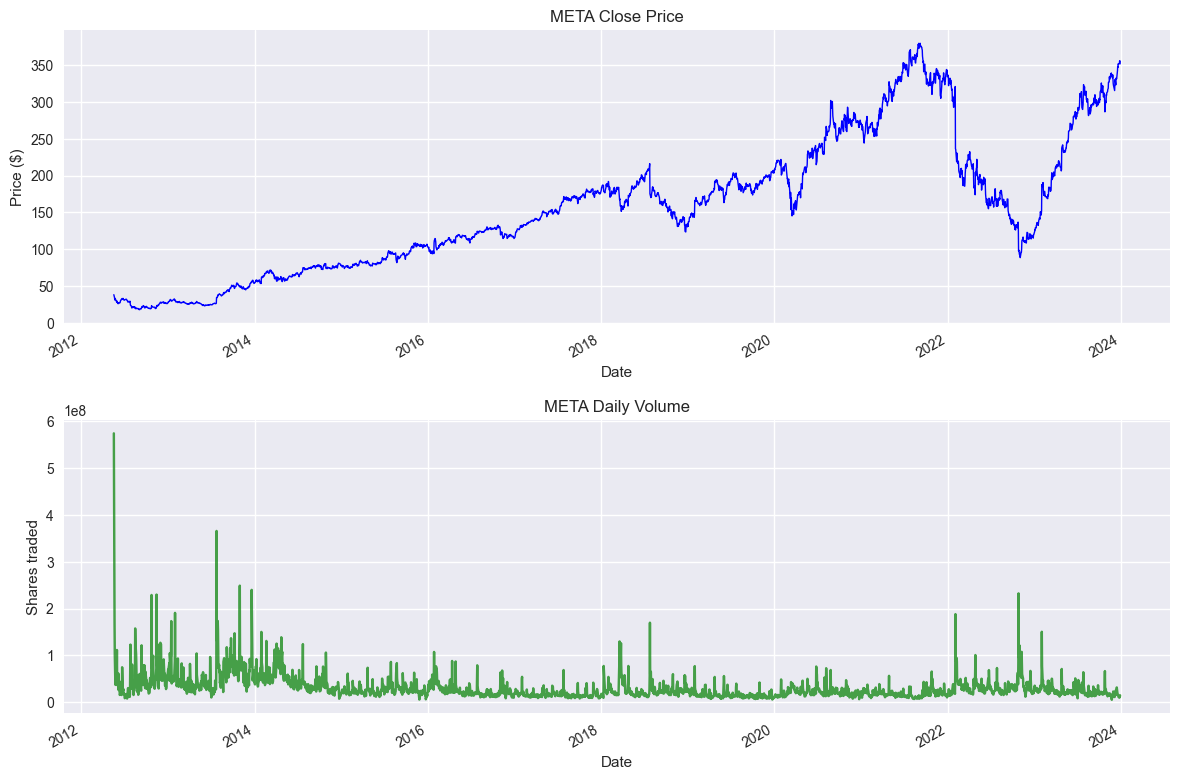


PRICE AND VOLUME ANALYSIS: MSFT
         count          mean           std           min           25%  \
Close   3774.0  1.024587e+02  1.005300e+02  1.115939e+01  2.372356e+01   
Volume  3774.0  3.895754e+07  2.245626e+07  7.425600e+06  2.398462e+07   

                 50%           75%           max  
Close   4.897156e+01  1.658316e+02  3.777836e+02  
Volume  3.279110e+07  4.865400e+07  3.193179e+08  


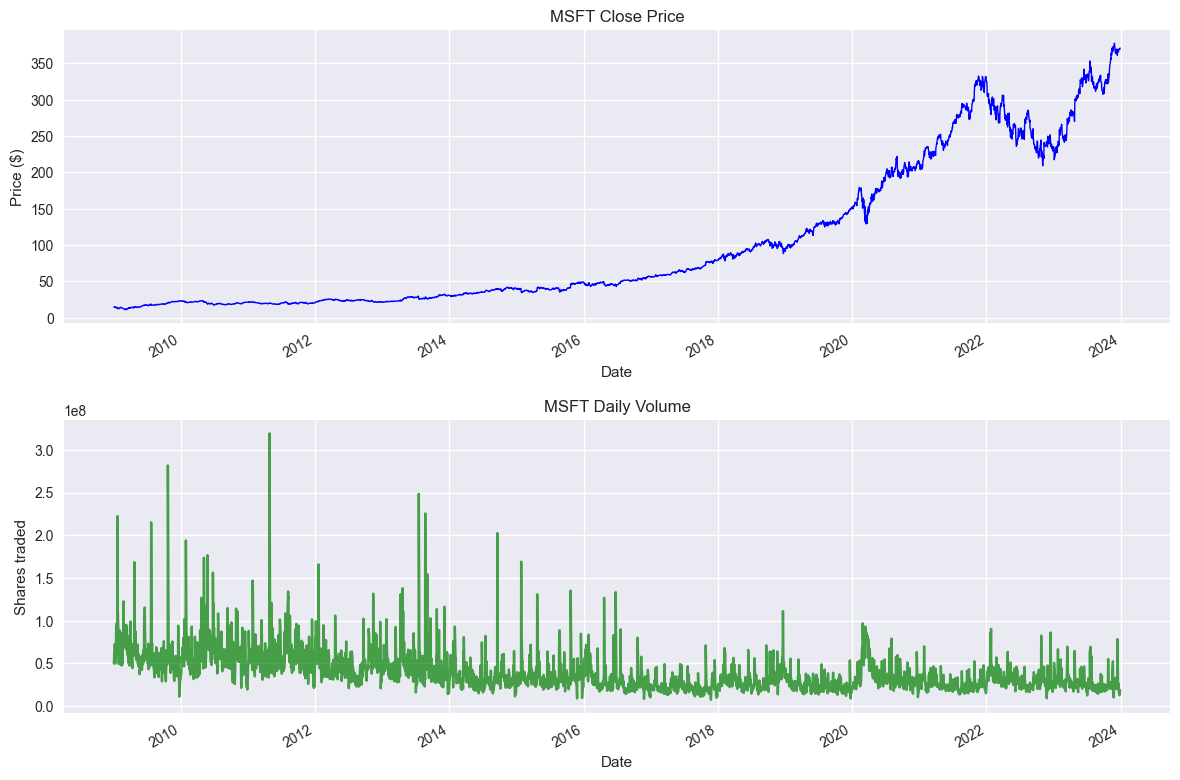


PRICE AND VOLUME ANALYSIS: NVDA
         count          mean           std           min           25%  \
Close   3774.0  6.796822e+00  1.065975e+01  1.652686e-01  3.573966e-01   
Volume  3774.0  5.230753e+08  3.205760e+08  4.564400e+07  3.188510e+08   

                 50%           75%           max  
Close   1.167304e+00  7.018725e+00  5.037931e+01  
Volume  4.495585e+08  6.419770e+08  3.692928e+09  


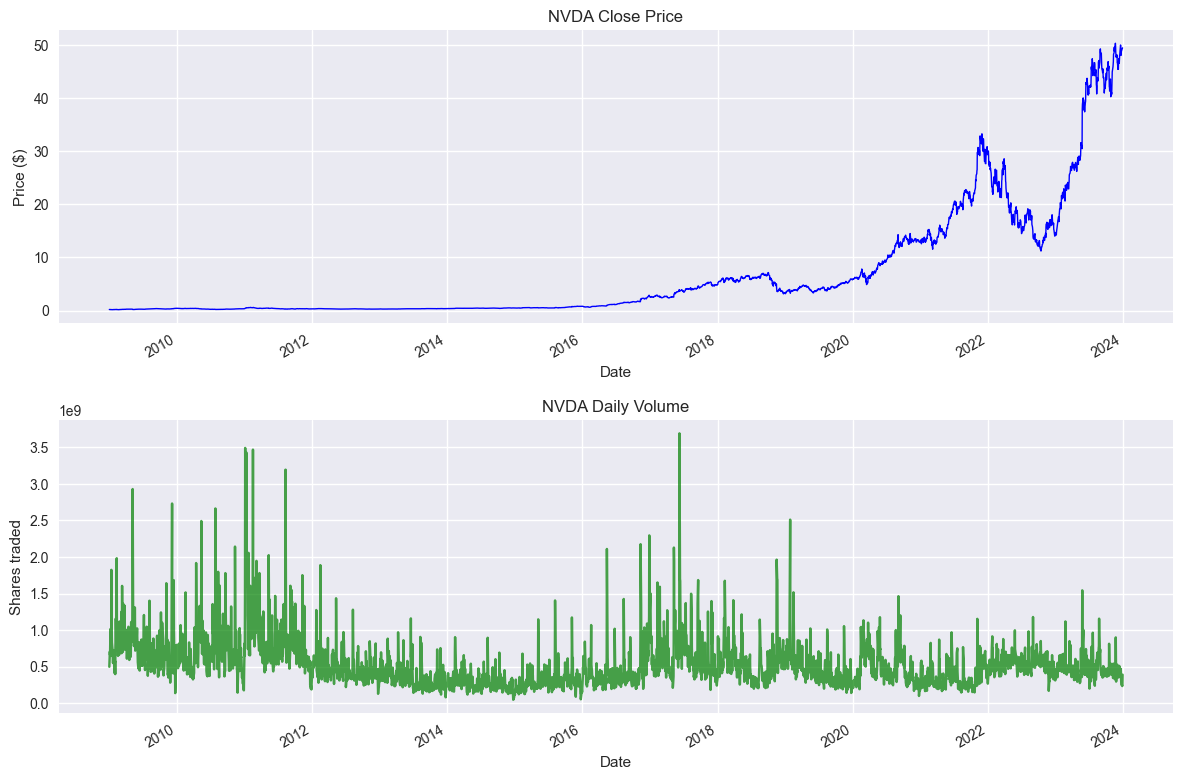

In [121]:
# Quick look at price and volume for EACH stock

for symbol, df in stock_data.items():
    print(f"\n{'='*50}")
    print(f"PRICE AND VOLUME ANALYSIS: {symbol}")
    print(f"{'='*50}")
    
    # Basic statistics
    print(df[['Close', 'Volume']].describe().T)
    
    # Create subplots for price and volume
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Close price chart
    df["Close"].plot(ax=ax1, title=f"{symbol} Close Price", color='blue', linewidth=1)
    ax1.set_ylabel("Price ($)")
    ax1.grid(True)
    
    # Volume chart
    df["Volume"].plot(ax=ax2, title=f"{symbol} Daily Volume", color='green', alpha=0.7)
    ax2.set_ylabel("Shares traded")
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

Calculate technical indicators for each stock

In [122]:
# Calculate technical indicators for each stock
indicators_data = {}

for symbol, df in stock_data.items():
    ti = TechnicalIndicators(df)
    df_ind = ti.calculate_all_indicators()
    indicators_data[symbol] = df_ind
    print(f"{symbol} indicators – last few rows:")
    display(df_ind.tail())


 All technical indicators calculated
AAPL indicators – last few rows:


,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,191.856618,183.572859,54.672784,2.633141,3.235256,-0.602115
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,192.018094,183.858864,53.090049,2.304751,3.049155,-0.744404
2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700,192.154308,184.149424,53.354446,2.029104,2.845145,-0.816041
2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900,192.362839,184.479567,54.540999,1.823998,2.640915,-0.816918
2023-12-29,190.728775,192.581275,189.936256,192.085953,42672100,192.490633,184.814828,51.121347,1.559539,2.424640,-0.865101


 All technical indicators calculated
AMZN indicators – last few rows:


,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,
2023-12-22,153.419998,154.350006,152.710007,153.770004,29514100,148.578999,141.2430,64.115558,3.135958,2.873052,0.262905
2023-12-26,153.410004,153.979996,153.029999,153.559998,25067200,148.863000,141.7154,64.085644,3.118650,2.922172,0.196478
2023-12-27,153.339996,154.779999,153.119995,153.559998,31434700,149.178500,142.1312,63.860893,3.063965,2.950530,0.113434
2023-12-28,153.380005,154.080002,152.949997,153.720001,27057000,149.531499,142.5694,63.938728,2.989395,2.958303,0.031092
2023-12-29,151.940002,153.889999,151.029999,153.100006,39823200,149.824000,143.0456,59.012257,2.782032,2.923049,-0.141017


 All technical indicators calculated
GOOG indicators – last few rows:


,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,
2023-12-22,141.750000,142.276397,141.089511,141.164014,18513500,135.009596,133.914786,64.953309,1.412015,0.572046,0.839969
2023-12-26,141.849304,142.966658,141.531472,142.008205,11170100,135.246477,133.999010,65.115870,1.706565,0.798950,0.907615
2023-12-27,140.478683,142.345911,140.092320,141.859236,17288400,135.386520,134.017881,60.916026,1.808553,1.000870,0.807682
2023-12-28,140.319748,141.303025,139.870824,140.885881,12192500,135.628861,134.023641,60.429303,1.855168,1.171730,0.683438
2023-12-29,139.972137,140.473710,138.949139,139.723837,14881000,135.976979,134.056417,59.313063,1.842820,1.305948,0.536872


 All technical indicators calculated
META indicators – last few rows:


,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,
2023-12-22,351.224823,355.011477,349.068105,353.401377,11772800,332.302945,323.317843,67.333885,6.945367,4.729907,2.215461
2023-12-26,352.655975,354.792827,351.284456,352.814999,9898600,333.303278,324.115724,68.187000,7.436800,5.271285,2.165514
2023-12-27,355.637543,356.800387,353.132994,353.888347,13207900,334.239505,324.844828,69.947874,7.974921,5.812012,2.162908
2023-12-28,356.124634,359.682686,355.617749,357.496184,11798800,335.537503,325.527023,70.237702,8.344500,6.318510,2.025990
2023-12-29,351.791290,357.794292,349.664418,356.790470,14987100,336.869788,326.262290,64.296803,8.193282,6.693464,1.499818


 All technical indicators calculated
MSFT indicators – last few rows:


,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,
2023-12-22,369.767883,370.360181,367.921911,368.879451,17107500,368.730389,355.078464,56.363342,2.805416,3.840081,-1.034664
2023-12-26,369.846832,372.097540,368.701731,370.182461,12673100,368.535426,356.018111,56.447998,2.767033,3.625471,-0.858438
2023-12-27,369.264465,370.241738,368.020642,368.889342,14905400,368.109468,356.849368,55.591261,2.658971,3.432171,-0.773200
2023-12-28,370.458862,371.623696,369.353256,370.547702,14327000,367.933260,357.715942,57.031664,2.639285,3.273594,-0.634309
2023-12-29,371.209198,372.314805,368.682088,371.169703,18730800,367.791606,358.635943,57.954296,2.653640,3.149603,-0.495963


 All technical indicators calculated
NVDA indicators – last few rows:


,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,
2023-12-22,48.805527,49.358247,48.442706,49.170342,252507000,47.706983,46.257777,55.352119,0.634352,0.564438,0.069914
2023-12-26,49.254299,49.575137,48.935459,48.943454,244200000,47.759019,46.334178,57.245971,0.655689,0.582688,0.073001
2023-12-27,49.392231,49.655100,49.060397,49.486186,233648000,47.838989,46.400666,57.837928,0.675937,0.601338,0.074599
2023-12-28,49.497185,49.859003,49.387239,49.618126,246587000,47.908266,46.512367,58.310919,0.692470,0.619564,0.072906
2023-12-29,49.497185,49.971949,48.726571,49.788039,389293000,48.046003,46.658888,58.310919,0.697532,0.635158,0.062374


Visualize price + indicators

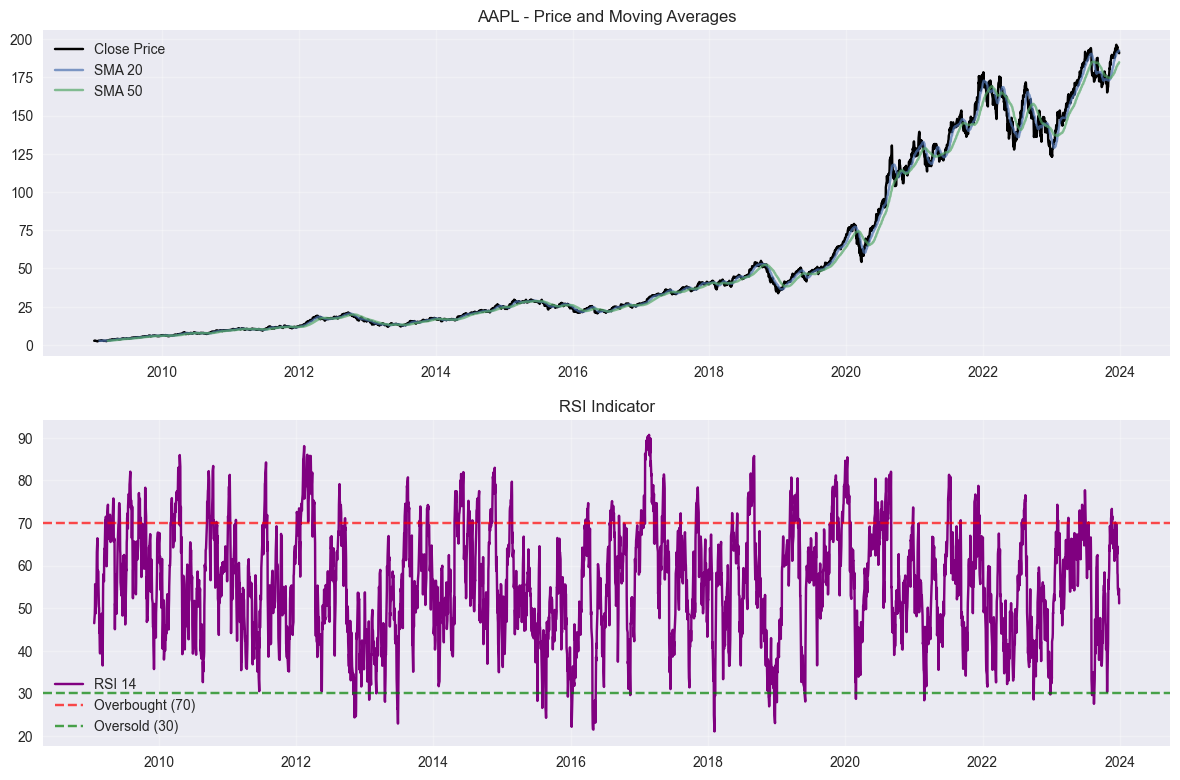

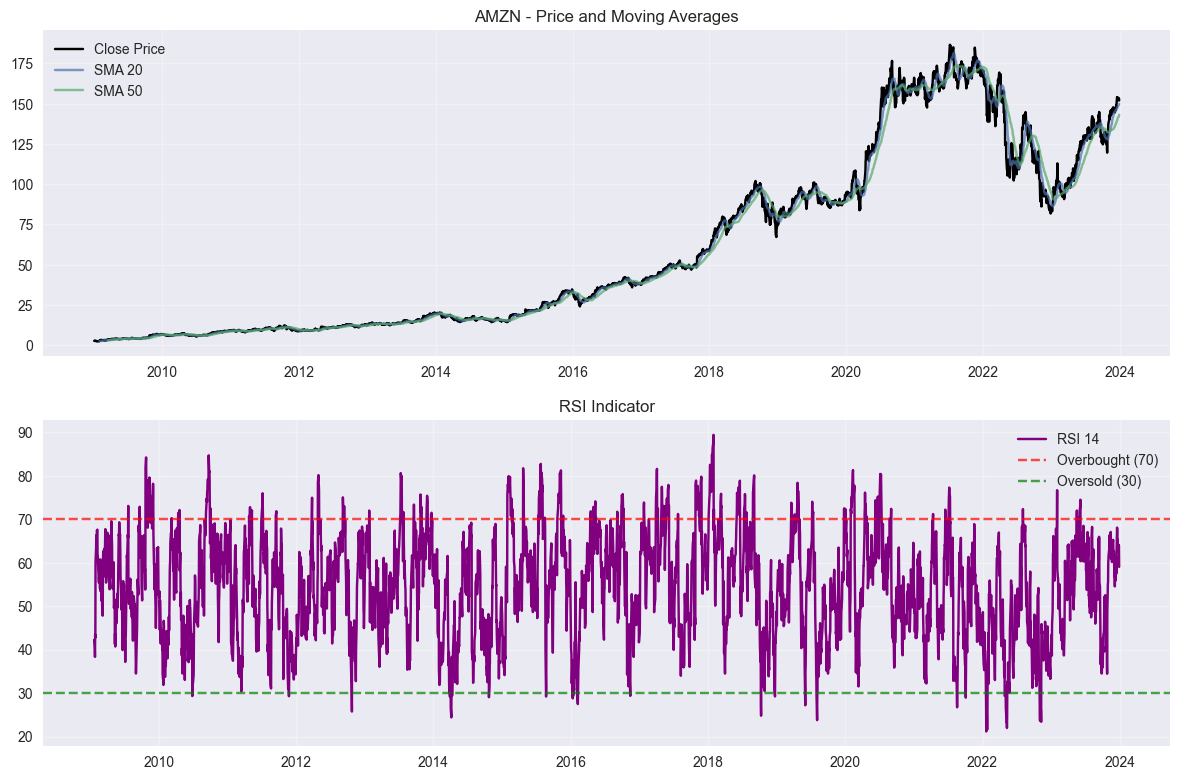

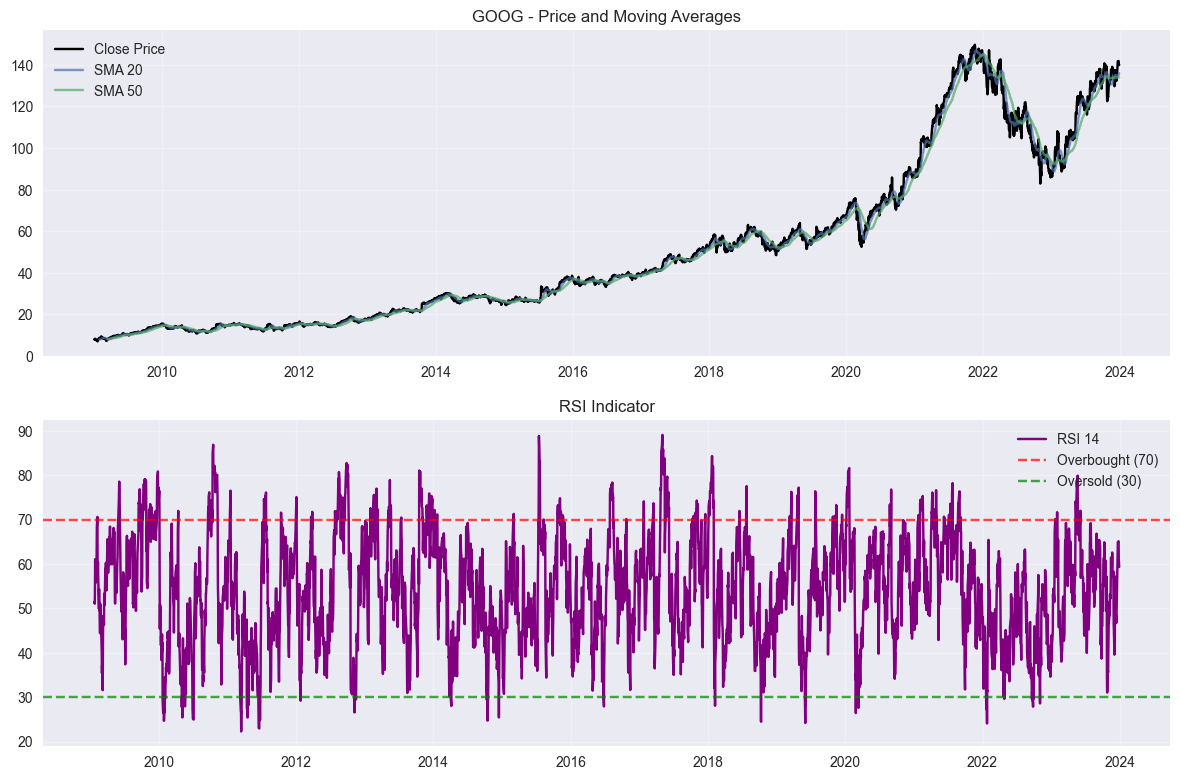

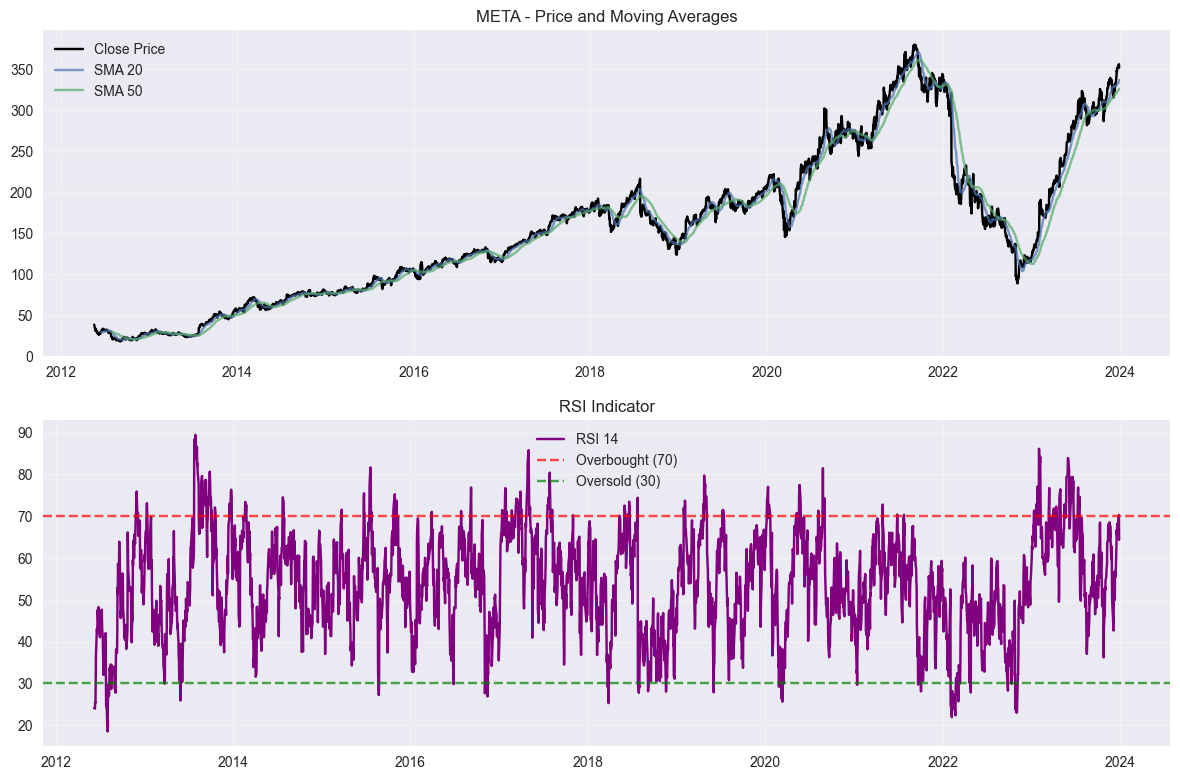

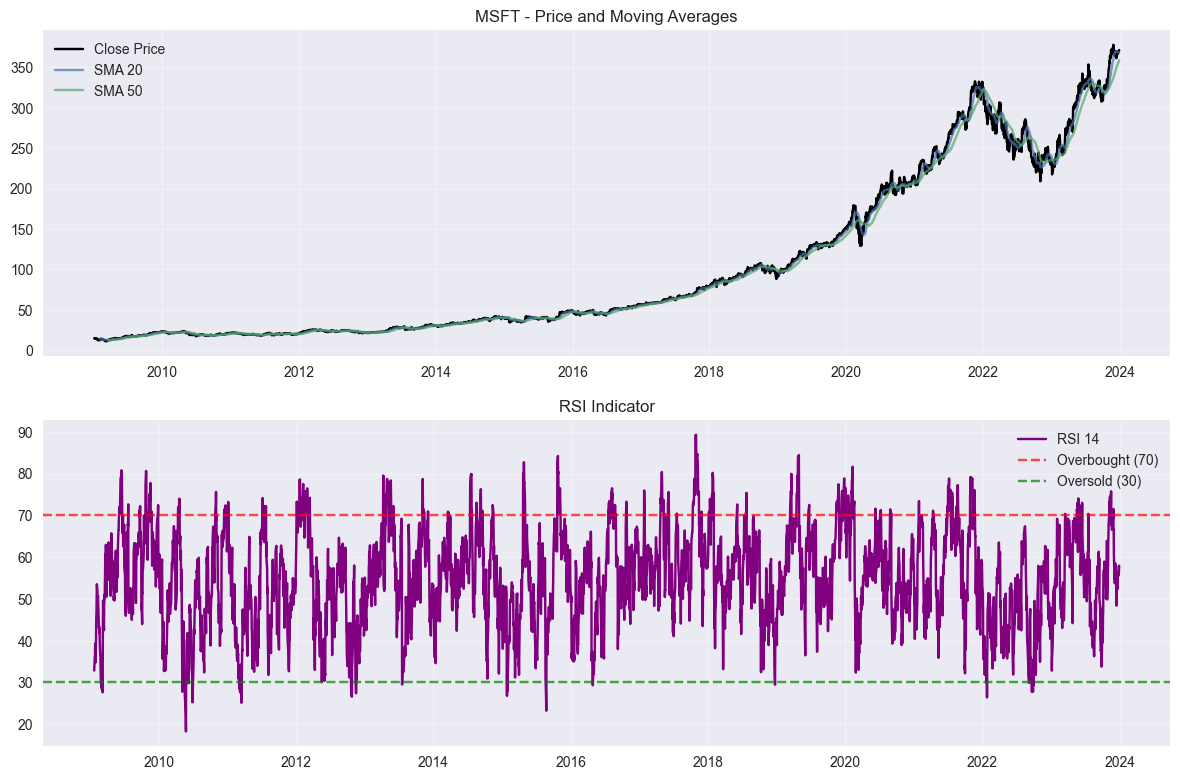

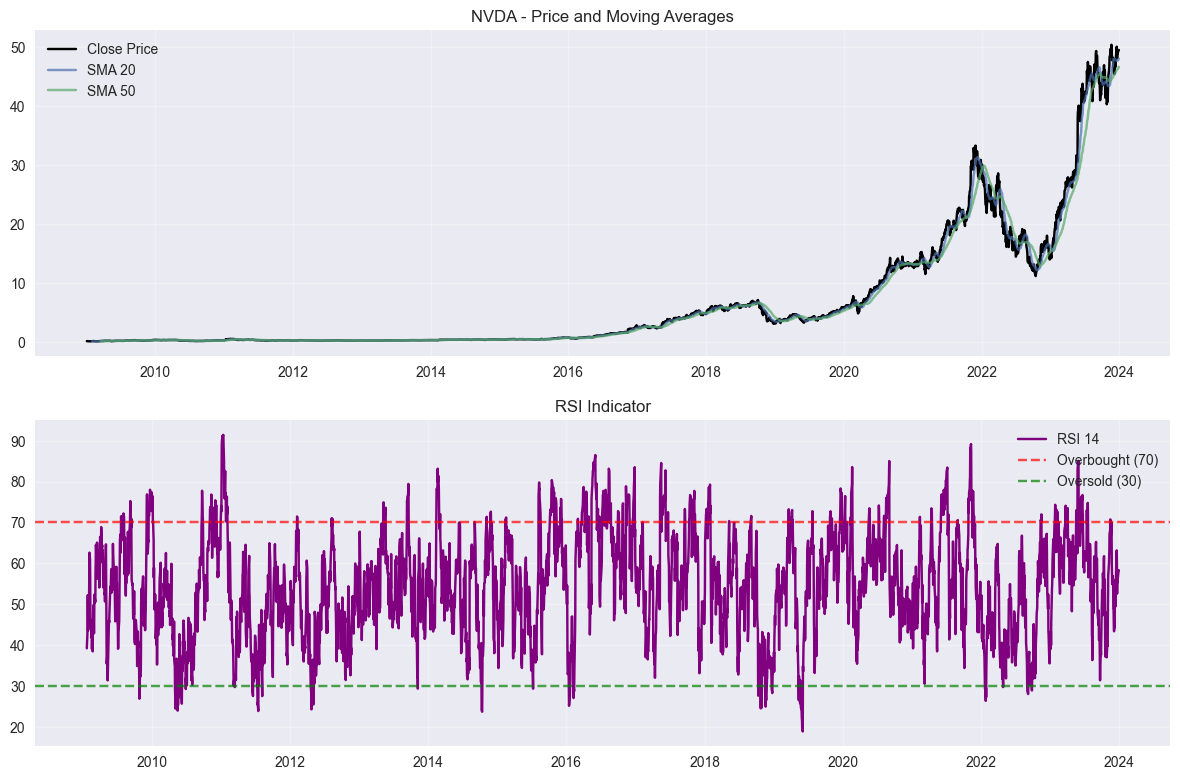

In [123]:
# Visualize price + indicators for AAPL
symbol = "AAPL"
df_viz = indicators_data[symbol]
viz = StockVisualizer(df_viz)
viz.plot_basic_analysis(symbol=symbol)

# Visualize price + indicators for AMZN
symbol = "AMZN"
df_viz = indicators_data[symbol]
viz = StockVisualizer(df_viz)
viz.plot_basic_analysis(symbol=symbol)

# Visualize price + indicators for GOOG
symbol = "GOOG"
df_viz = indicators_data[symbol]
viz = StockVisualizer(df_viz)
viz.plot_basic_analysis(symbol=symbol)

# Visualize price + indicators for META
symbol = "META"
df_viz = indicators_data[symbol]
viz = StockVisualizer(df_viz)
viz.plot_basic_analysis(symbol=symbol)

# Visualize price + indicators for MSFT
symbol = "MSFT"
df_viz = indicators_data[symbol]
viz = StockVisualizer(df_viz)
viz.plot_basic_analysis(symbol=symbol)

# Visualize price + indicators for NVDA
symbol = "NVDA"
df_viz = indicators_data[symbol]
viz = StockVisualizer(df_viz)
viz.plot_basic_analysis(symbol=symbol)


Plot MACD


Loading AAPL...
📁 Loading from: ../data/yfinance_data\AAPL.csv
📊 Initial columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
📅 Initial shape: (3774, 6)
🔧 Standardized columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✅ Loaded 3774 days of data for AAPL
✅ Successfully loaded AAPL

Loading AMZN...
📁 Loading from: ../data/yfinance_data\AMZN.csv
📊 Initial columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
📅 Initial shape: (3774, 6)
🔧 Standardized columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✅ Loaded 3774 days of data for AMZN
✅ Successfully loaded AMZN

Loading GOOG...
📁 Loading from: ../data/yfinance_data\GOOG.csv
📊 Initial columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
📅 Initial shape: (3774, 6)
🔧 Standardized columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✅ Loaded 3774 days of data for GOOG
✅ Successfully loaded GOOG

Loading META...
📁 Loading from: ../data/yfinance_data\META.csv
📊 Initial columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Vo

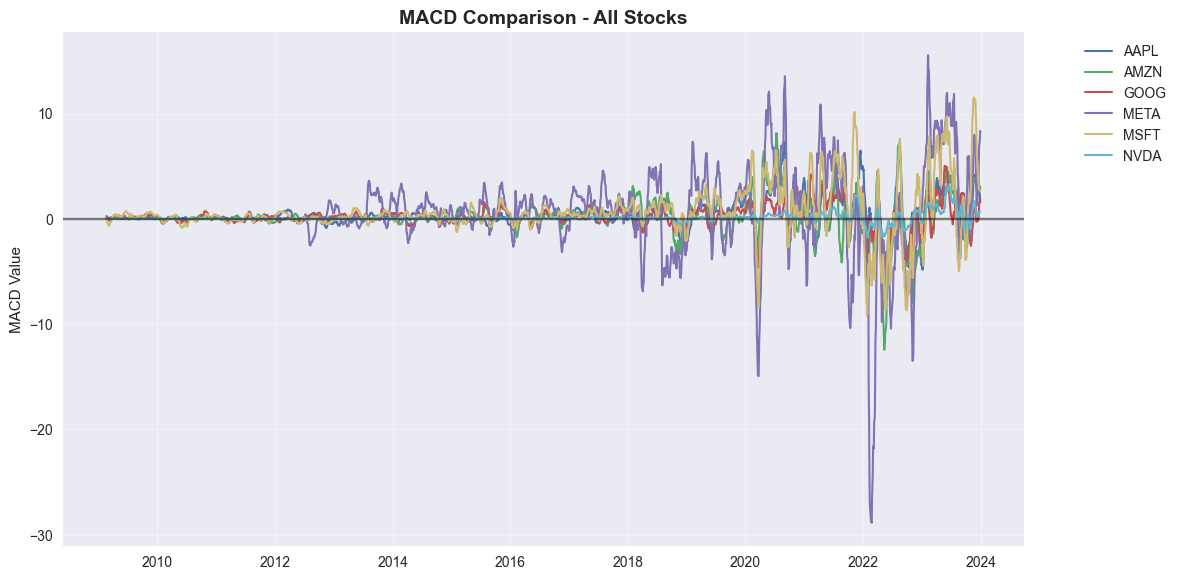

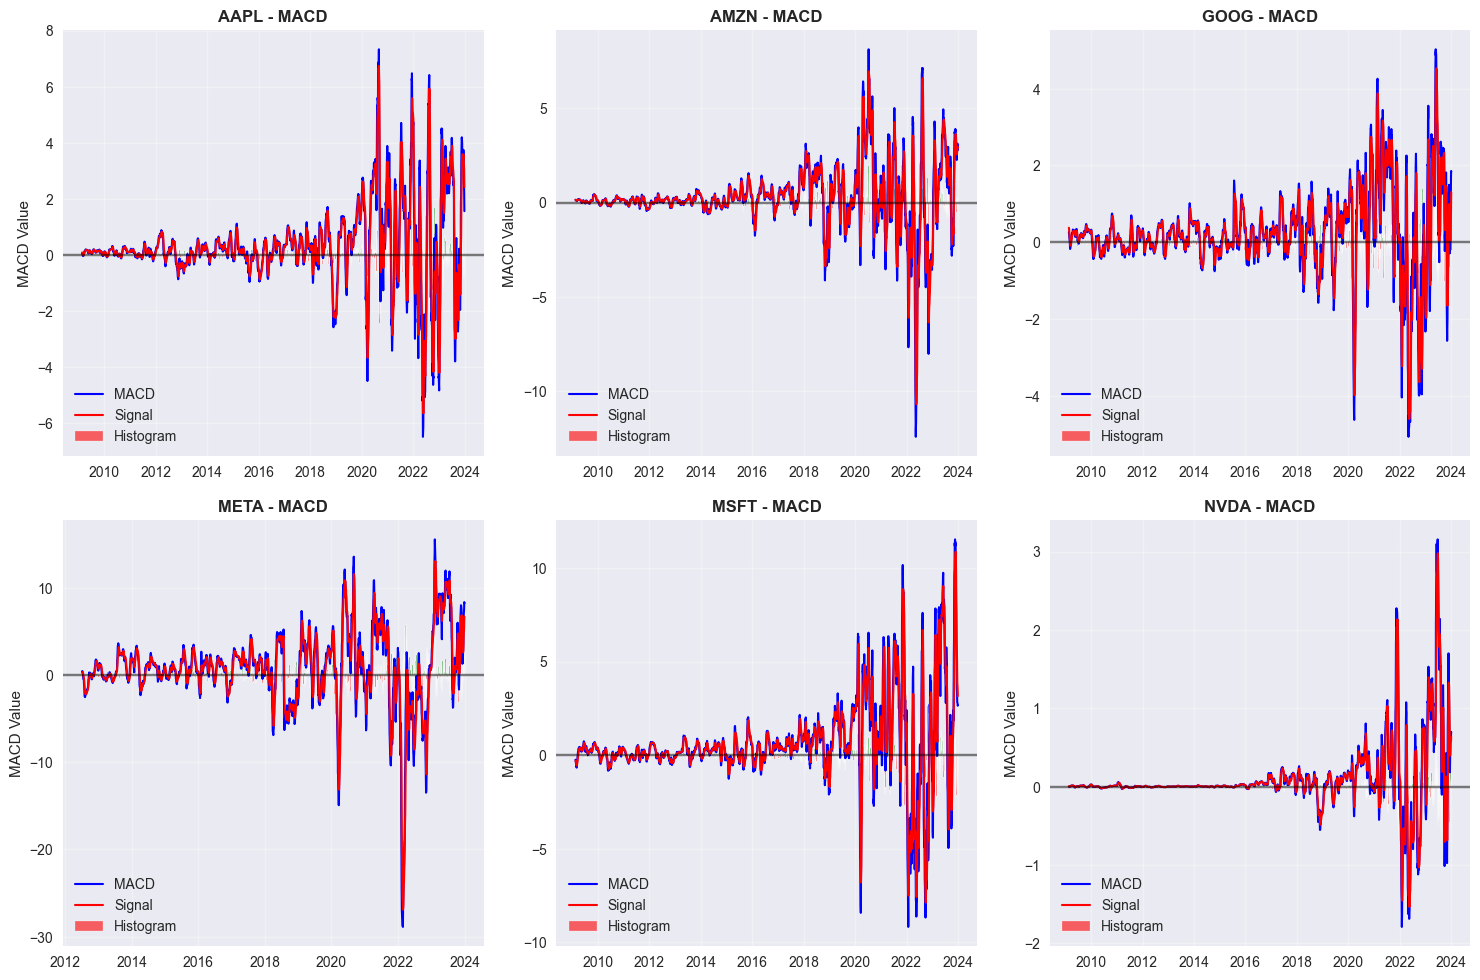

In [124]:
# Define symbols and load data
symbols = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]
loader = StockDataLoader(data_path="../data/yfinance_data")
stock_data = loader.load_multiple_stocks(symbols)

# Comparative MACD Analysis

# First, calculate MACD for all stocks and store results
macd_results = {}

for symbol, df in stock_data.items():
    # Calculate MACD
    macd, macd_signal, macd_hist = talib.MACD(df['Close'])
    
    # Store in dataframe
    df['MACD'] = macd
    df['MACD_signal'] = macd_signal
    df['MACD_hist'] = macd_hist
    
    # Store results
    macd_results[symbol] = {
        'macd': macd,
        'signal': macd_signal,
        'hist': macd_hist
    }
    
    print(f"✓ Calculated MACD for {symbol}")

# Plot 1: All MACD lines together
plt.figure(figsize=(12, 6))
for symbol in symbols:
    plt.plot(stock_data[symbol].index, macd_results[symbol]['macd'], 
             label=symbol, linewidth=1.5)
plt.title('MACD Comparison - All Stocks', fontsize=14, fontweight='bold')
plt.ylabel('MACD Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Individual MACD charts in subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, symbol in enumerate(symbols):
    df = stock_data[symbol]
    ax = axes[idx]
    
    ax.plot(df.index, df['MACD'], label="MACD", linewidth=1.5, color='blue')
    ax.plot(df.index, df['MACD_signal'], label="Signal", linewidth=1.5, color='red')
    
    colors = ['green' if x >= 0 else 'red' for x in df['MACD_hist']]
    ax.bar(df.index, df['MACD_hist'], label="Histogram", color=colors, alpha=0.6, width=0.8)
    
    ax.set_title(f"{symbol} - MACD", fontsize=12, fontweight='bold')
    ax.set_ylabel("MACD Value")
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

Exploratory correlation analysis — indicator vs returns

In [125]:
# Exploratory correlation analysis — indicator vs returns
for symbol, df in indicators_data.items():
    df = df.copy()
    df["Return"] = df["Close"].pct_change()
    corr = df[["Return", "SMA_20", "SMA_50", "RSI_14", "MACD", "MACD_Signal", "MACD_Hist"]].corr()
    print(f"Correlation matrix for {symbol}:")
    print(corr, "\n")


Correlation matrix for AAPL:
               Return    SMA_20    SMA_50    RSI_14      MACD  MACD_Signal  \
Return       1.000000 -0.017730 -0.017953  0.320014  0.042231     0.000829   
SMA_20      -0.017730  1.000000  0.998318 -0.058480  0.213532     0.238947   
SMA_50      -0.017953  0.998318  1.000000 -0.084189  0.166491     0.185188   
RSI_14       0.320014 -0.058480 -0.084189  1.000000  0.552374     0.453181   
MACD         0.042231  0.213532  0.166491  0.552374  1.000000     0.952132   
MACD_Signal  0.000829  0.238947  0.185188  0.453181  0.952132     1.000000   
MACD_Hist    0.135472 -0.035072 -0.023915  0.415181  0.347646     0.044384   

             MACD_Hist  
Return        0.135472  
SMA_20       -0.035072  
SMA_50       -0.023915  
RSI_14        0.415181  
MACD          0.347646  
MACD_Signal   0.044384  
MACD_Hist     1.000000   

Correlation matrix for AMZN:
               Return    SMA_20    SMA_50    RSI_14      MACD  MACD_Signal  \
Return       1.000000 -0.030431 -0.02

## Technical Analysis


TASK 2: TECHNICAL ANALYSIS WITH LOCAL DATA

 Loading local stock data...
 AAPL: Loaded 3774 days from 2009-01-02 to 2023-12-29
 AMZN: Loaded 3774 days from 2009-01-02 to 2023-12-29
 GOOGL: File not found at ../data/yfinance_data/GOOGL.csv
 META: Loaded 2923 days from 2012-05-18 to 2023-12-29
 MSFT: Loaded 3774 days from 2009-01-02 to 2023-12-29
 NVDA: Loaded 3774 days from 2009-01-02 to 2023-12-29

 Performing technical analysis...

 Analyzing AAPL...
 AAPL: Technical analysis complete - 3774 days

 Analyzing AMZN...
 AMZN: Technical analysis complete - 3774 days

 Analyzing META...
 META: Technical analysis complete - 2923 days

 Analyzing MSFT...
 MSFT: Technical analysis complete - 3774 days

 Analyzing NVDA...
 NVDA: Technical analysis complete - 3774 days

 TASK 2 COMPLETE: Analyzed 5 stocks

 Creating charts for AAPL...


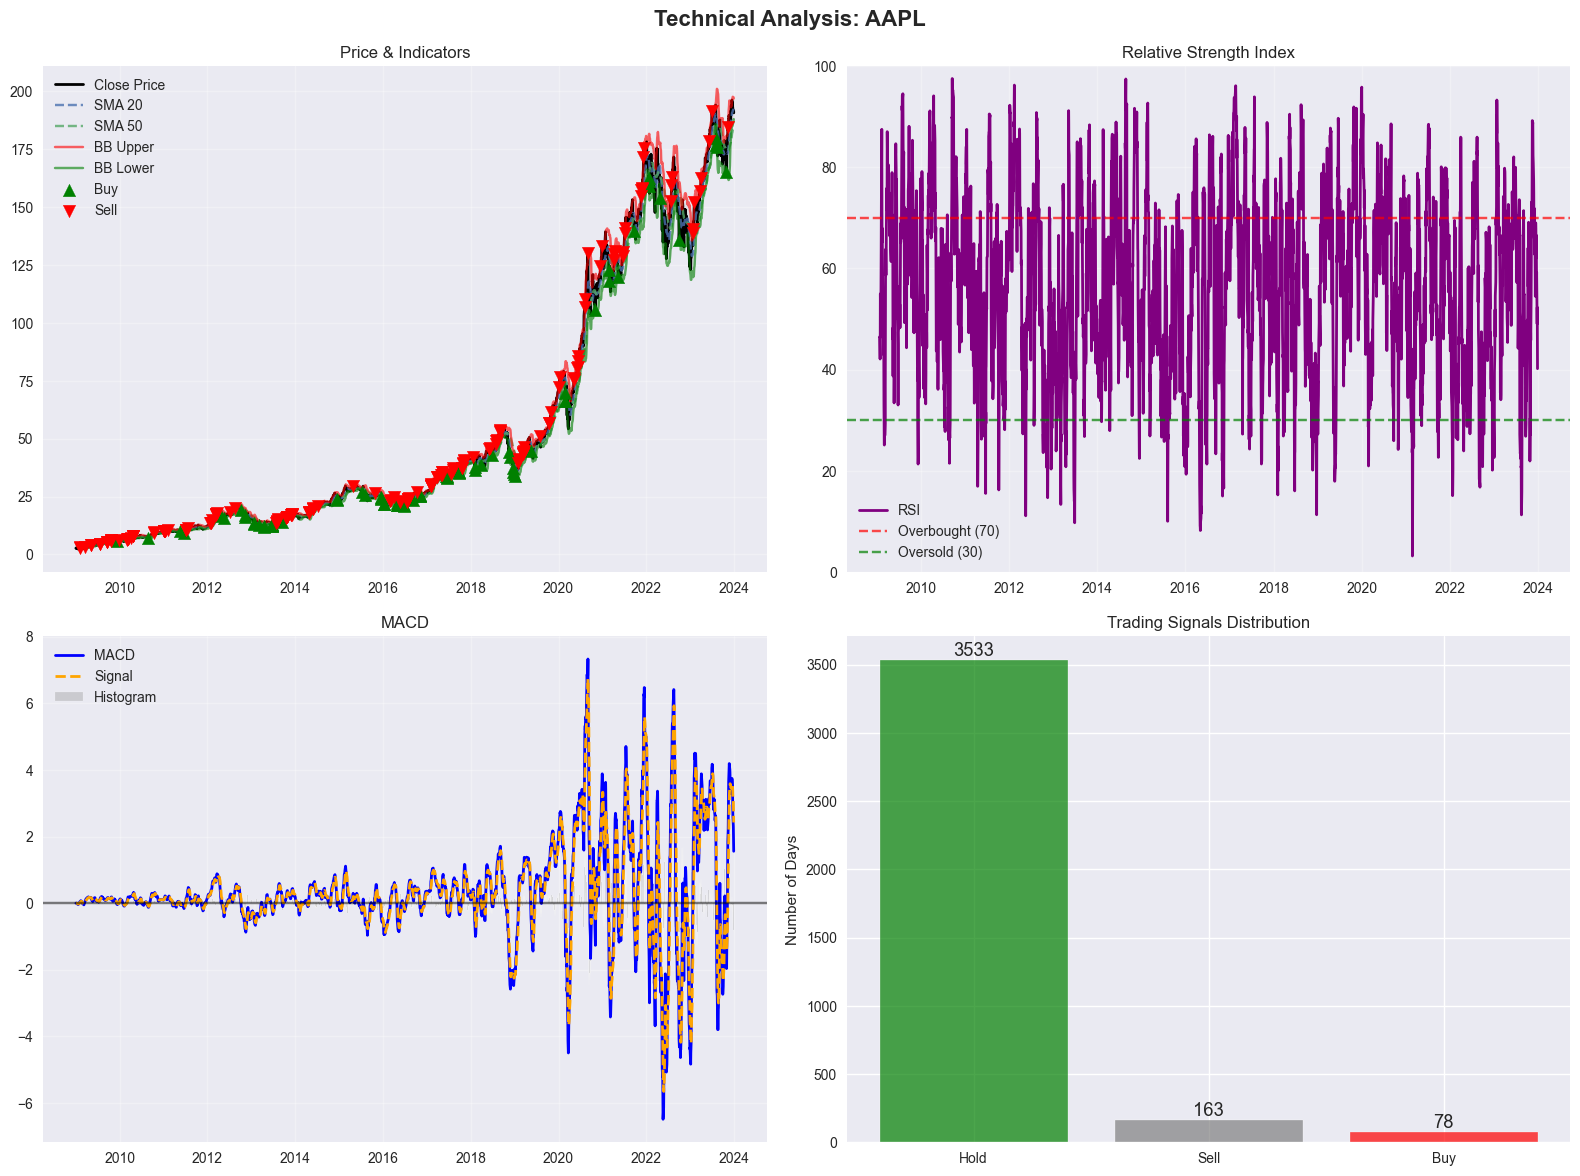

    AAPL Current Status:
      Price: $190.73
      RSI: 40.2
      Signal: HOLD
      Buy signals: 78, Sell signals: 163

 Creating charts for AMZN...


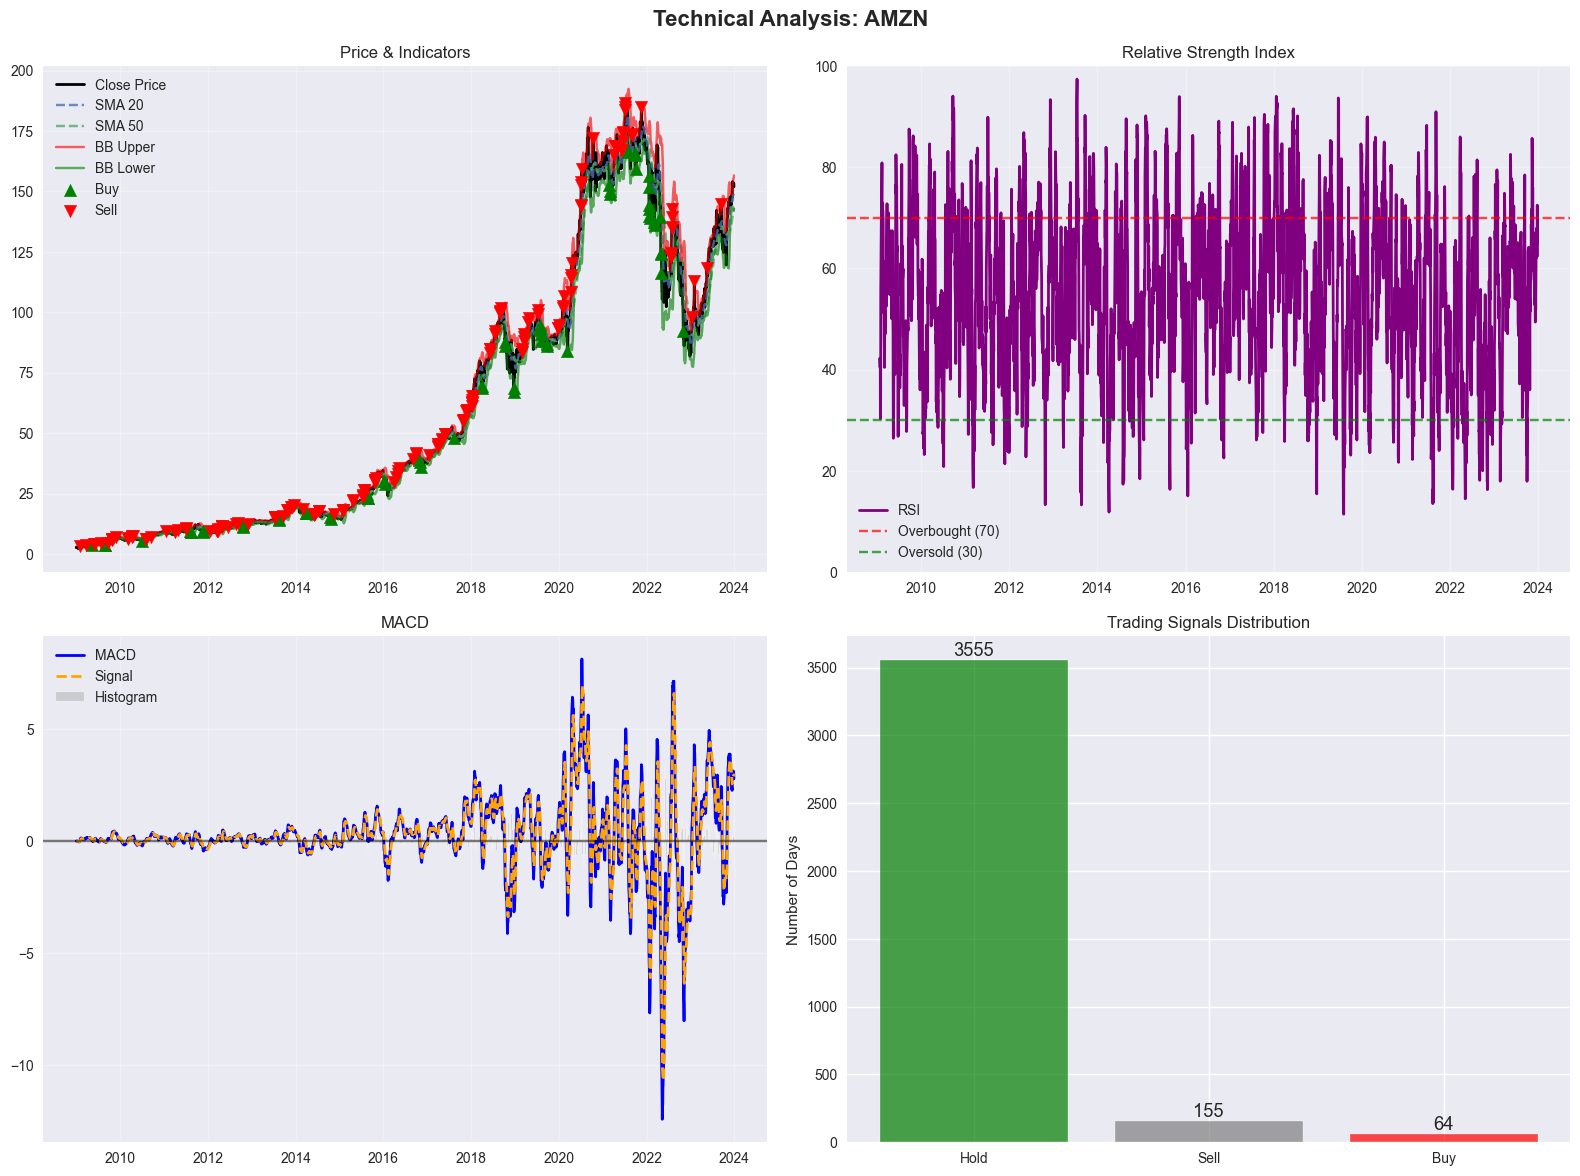

    AMZN Current Status:
      Price: $151.94
      RSI: 62.4
      Signal: HOLD
      Buy signals: 64, Sell signals: 155

 Creating charts for META...


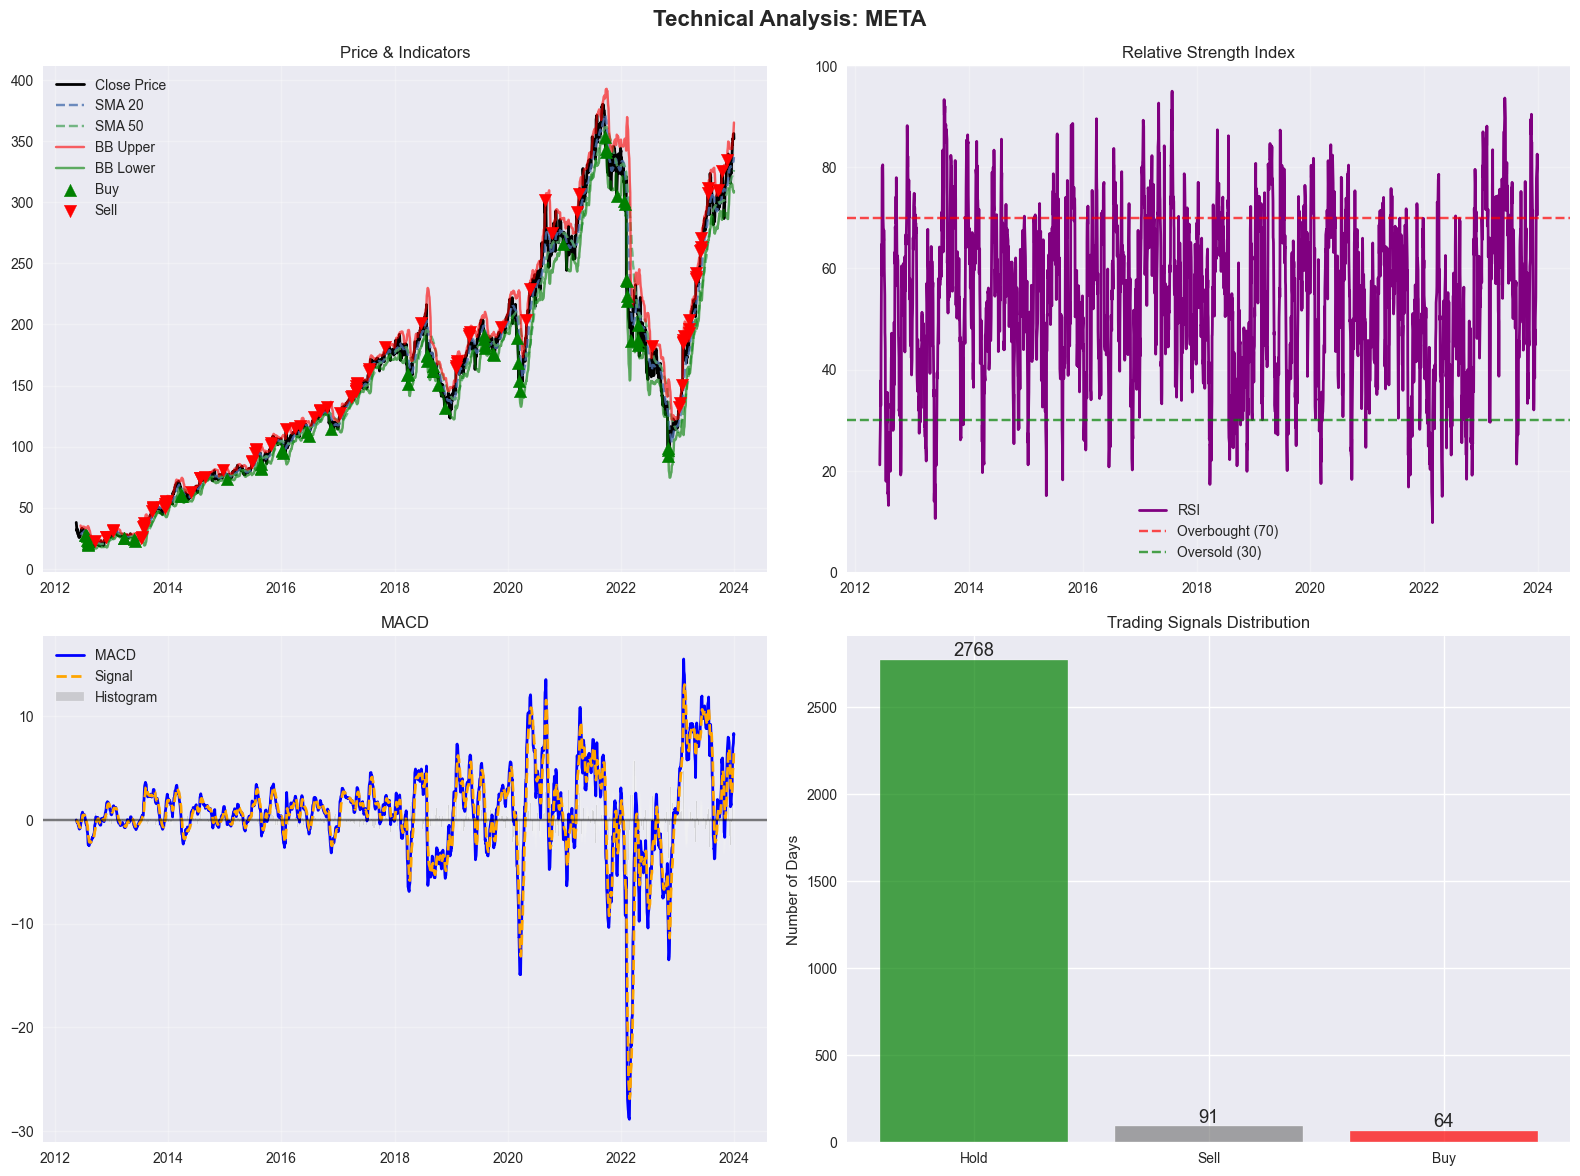

    META Current Status:
      Price: $351.79
      RSI: 70.6
      Signal: HOLD
      Buy signals: 64, Sell signals: 91

TECHNICAL ANALYSIS SUMMARY
Stock   Price  RSI Signal  Buy Signals  Sell Signals  Days Analyzed
 AAPL $190.73 40.2   HOLD           78           163           3774
 AMZN $151.94 62.4   HOLD           64           155           3774
 META $351.79 70.6   HOLD           64            91           2923
 MSFT $371.21 52.9   HOLD           51           140           3774
 NVDA  $49.50 62.6   HOLD           58           153           3774


In [138]:
# Technical Analysis
print("\n" + "="*60)
print("TASK 2: TECHNICAL ANALYSIS WITH LOCAL DATA")
print("="*60)

def load_local_stock_data(symbols):
    """Load stock data from local CSV files"""
    stock_data = {}
    
    for symbol in symbols:
        file_path = f'../data/yfinance_data/{symbol}.csv'
        try:
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
                df = df.sort_index()  # Ensure chronological order
                stock_data[symbol] = df
                print(f" {symbol}: Loaded {len(df)} days from {df.index.min().date()} to {df.index.max().date()}")
            else:
                print(f" {symbol}: File not found at {file_path}")
        except Exception as e:
            print(f" {symbol}: Error loading file - {e}")
    
    return stock_data

def technical_analysis_local(stock_data):
    """Technical analysis using local data with manual calculations"""
    results = {}
    
    for symbol, df in stock_data.items():
        print(f"\n Analyzing {symbol}...")
        try:
            # Make a copy for analysis
            df_analysis = df.copy()
            
            # 1. Calculate Simple Moving Averages
            df_analysis['SMA_20'] = df_analysis['Close'].rolling(window=20).mean()
            df_analysis['SMA_50'] = df_analysis['Close'].rolling(window=50).mean()
            
            # 2. Calculate RSI manually
            delta = df_analysis['Close'].diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
            rs = gain / loss
            df_analysis['RSI'] = 100 - (100 / (1 + rs))
            
            # 3. Calculate Bollinger Bands
            df_analysis['BB_Middle'] = df_analysis['Close'].rolling(window=20).mean()
            bb_std = df_analysis['Close'].rolling(window=20).std()
            df_analysis['BB_Upper'] = df_analysis['BB_Middle'] + (2 * bb_std)
            df_analysis['BB_Lower'] = df_analysis['BB_Middle'] - (2 * bb_std)
            
            # 4. Calculate MACD manually
            exp1 = df_analysis['Close'].ewm(span=12).mean()
            exp2 = df_analysis['Close'].ewm(span=26).mean()
            df_analysis['MACD'] = exp1 - exp2
            df_analysis['MACD_Signal'] = df_analysis['MACD'].ewm(span=9).mean()
            df_analysis['MACD_Histogram'] = df_analysis['MACD'] - df_analysis['MACD_Signal']
            
            # 5. Generate trading signals
            df_analysis['Signal'] = 0
            # Buy signal: RSI < 30 and price below lower Bollinger Band
            buy_condition = (df_analysis['RSI'] < 30) & (df_analysis['Close'] < df_analysis['BB_Lower'])
            df_analysis.loc[buy_condition, 'Signal'] = 1
            
            # Sell signal: RSI > 70 and price above upper Bollinger Band
            sell_condition = (df_analysis['RSI'] > 70) & (df_analysis['Close'] > df_analysis['BB_Upper'])
            df_analysis.loc[sell_condition, 'Signal'] = -1
            
            results[symbol] = df_analysis
            print(f" {symbol}: Technical analysis complete - {len(df_analysis)} days")
            
        except Exception as e:
            print(f" {symbol}: Analysis failed - {e}")
    
    return results

# Load and analyze local data
print("\n Loading local stock data...")
local_stock_data = load_local_stock_data(available_stocks)

if local_stock_data:
    print(f"\n Performing technical analysis...")
    technical_results = technical_analysis_local(local_stock_data)
    
    if technical_results:
        print(f"\n TASK 2 COMPLETE: Analyzed {len(technical_results)} stocks")
        
        # Create visualizations
        for symbol, df in list(technical_results.items())[:3]:  # Show first 3 stocks
            print(f"\n Creating charts for {symbol}...")
            
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
            fig.suptitle(f'Technical Analysis: {symbol}', fontsize=16, fontweight='bold')
            
            # 1. Price with indicators
            ax1.plot(df.index, df['Close'], label='Close Price', linewidth=2, color='black')
            ax1.plot(df.index, df['SMA_20'], label='SMA 20', linestyle='--', alpha=0.8)
            ax1.plot(df.index, df['SMA_50'], label='SMA 50', linestyle='--', alpha=0.8)
            ax1.plot(df.index, df['BB_Upper'], label='BB Upper', color='red', alpha=0.6)
            ax1.plot(df.index, df['BB_Lower'], label='BB Lower', color='green', alpha=0.6)
            ax1.fill_between(df.index, df['BB_Upper'], df['BB_Lower'], alpha=0.1, color='gray')
            
            # Add signals
            buy_signals = df[df['Signal'] == 1]
            sell_signals = df[df['Signal'] == -1]
            if not buy_signals.empty:
                ax1.scatter(buy_signals.index, buy_signals['Close'], color='green', marker='^', s=80, label='Buy', zorder=5)
            if not sell_signals.empty:
                ax1.scatter(sell_signals.index, sell_signals['Close'], color='red', marker='v', s=80, label='Sell', zorder=5)
            
            ax1.set_title('Price & Indicators')
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            
            # 2. RSI
            ax2.plot(df.index, df['RSI'], label='RSI', linewidth=2, color='purple')
            ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
            ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
            ax2.set_ylim(0, 100)
            ax2.set_title('Relative Strength Index')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            
            # 3. MACD
            ax3.plot(df.index, df['MACD'], label='MACD', linewidth=2, color='blue')
            ax3.plot(df.index, df['MACD_Signal'], label='Signal', linewidth=2, color='orange', linestyle='--')
            ax3.bar(df.index, df['MACD_Histogram'], label='Histogram', alpha=0.3, color='gray')
            ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
            ax3.set_title('MACD')
            ax3.legend()
            ax3.grid(True, alpha=0.3)
            
            # 4. Signals distribution
            signal_counts = df['Signal'].value_counts()
            signal_labels = {1: 'Buy', 0: 'Hold', -1: 'Sell'}
            colors = ['green', 'gray', 'red']
            bars = ax4.bar([signal_labels.get(x, x) for x in signal_counts.index], 
                          signal_counts.values, color=colors, alpha=0.7)
            ax4.set_title('Trading Signals Distribution')
            ax4.set_ylabel('Number of Days')
            
            # Add value labels
            for bar, count in zip(bars, signal_counts.values):
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{count}', ha='center', va='bottom')
            
            plt.tight_layout()
            plt.show()
            
            # Print current status
            current = df.iloc[-1]
            print(f"    {symbol} Current Status:")
            print(f"      Price: ${current['Close']:.2f}")
            print(f"      RSI: {current['RSI']:.1f}")
            print(f"      Signal: {'BUY' if current['Signal'] == 1 else 'SELL' if current['Signal'] == -1 else 'HOLD'}")
            print(f"      Buy signals: {len(buy_signals)}, Sell signals: {len(sell_signals)}")
        
        # Summary table
        print(f"\n{'='*60}")
        print("TECHNICAL ANALYSIS SUMMARY")
        print(f"{'='*60}")
        
        summary_data = []
        for symbol, df in technical_results.items():
            current = df.iloc[-1]
            buy_count = len(df[df['Signal'] == 1])
            sell_count = len(df[df['Signal'] == -1])
            
            summary_data.append({
                'Stock': symbol,
                'Price': f"${current['Close']:.2f}",
                'RSI': f"{current['RSI']:.1f}",
                'Signal': 'BUY' if current['Signal'] == 1 else 'SELL' if current['Signal'] == -1 else 'HOLD',
                'Buy Signals': buy_count,
                'Sell Signals': sell_count,
                'Days Analyzed': len(df)
            })
        
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))
        
    else:
        print(" No technical results generated")
else:
    print(" No local stock data available")